<a href="https://colab.research.google.com/github/anyaozm/SPY-500-LSTM-Stock-Prediction/blob/master/StockUpdated.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
#Desc: LSTM for Closing Stock Price

In [1]:
#import
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM, Dropout,GRU
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

/usr/local/lib/python3.6/dist-packages/pandas_datareader/compat/__init__.py:7: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  from pandas.util.testing import assert_frame_equal
Using TensorFlow backend.


In [0]:
df = web.DataReader('SPY', data_source='yahoo', start='1960-01-01', end='2020-03-24')

In [3]:
df.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
1993-01-29,43.96875,43.75000,43.96875,43.93750,1003200.0,26.299288
1993-02-01,44.25000,43.96875,43.96875,44.25000,480500.0,26.486324
1993-02-02,44.37500,44.12500,44.21875,44.34375,201300.0,26.542448
1993-02-03,44.84375,44.37500,44.40625,44.81250,529400.0,26.822998
1993-02-04,45.09375,44.46875,44.96875,45.00000,531500.0,26.935240


In [4]:
df.shape

(6837, 6)

Text(0.5, 0, 'Price')

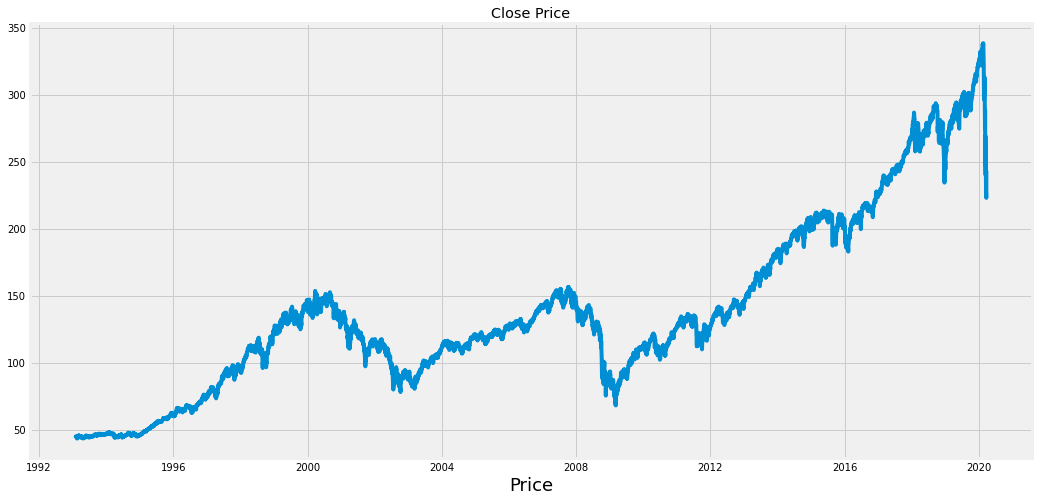

In [5]:
#visualize
plt.figure(figsize=(16,8))
plt.title('Close Price')
plt.plot(df['Close'])
plt.xlabel('Date',fontsize=18)
plt.xlabel('Price',fontsize=18)

In [6]:
#Create df with only close
data =df.filter(['Close'])
#convert the df into a numpy array
dataset=data.values
#get the number of rows to train
training_data_len = math.ceil(len(dataset)*.8) #math.ceil to round up

training_data_len

5470

In [0]:
#Scale data
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

In [8]:
#Create training dataset
train_data = scaled_data[0:training_data_len, :] #after the comma for columns
#Split data 
x_train = []
y_train = []

for i in range(10, len(train_data)): #60 days
  x_train.append(train_data[i-10:i,0]) #not including i and 0th column
  y_train.append(train_data[i, 0])
  if i<=11:
    print(x_train)
    print(y_train)
    print()

[array([0.00180125, 0.00286081, 0.00317868, 0.00476802, 0.00540376,
       0.0052978 , 0.0052978 , 0.00423824, 0.00445015, 0.00519184])]
[0.004026327996524137]

[array([0.00180125, 0.00286081, 0.00317868, 0.00476802, 0.00540376,
       0.0052978 , 0.0052978 , 0.00423824, 0.00445015, 0.00519184]), array([0.00286081, 0.00317868, 0.00476802, 0.00540376, 0.0052978 ,
       0.0052978 , 0.00423824, 0.00445015, 0.00519184, 0.00402633])]
[0.004026327996524137, 0.00021191199981704378]



In [0]:
#convert train data to numpy arrays
x_train, y_train = np.array(x_train), np.array(y_train)

In [10]:
#reshape LSTM is 3 dimensional rows, timesteps, number of features
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(5460, 10, 1)

In [0]:
#Build LSTM model
model =Sequential()
model.add(LSTM(100, return_sequences=True, input_shape=(x_train.shape[1],1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [35]:
model = Sequential()
model.add(GRU(256 , input_shape=(x_train.shape[1],1) , return_sequences=True))
model.add(Dropout(0.4))
model.add(LSTM(256))
model.add(Dropout(0.4))
model.add(Dense(64 ,  activation = 'relu'))
model.add(Dense(1))
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_2 (GRU)                  (None, 10, 256)           198144    
_________________________________________________________________
dropout_3 (Dropout)          (None, 10, 256)           0         
_________________________________________________________________
lstm_4 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dropout_4 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                16448     
_________________________________________________________________
dense_6 (Dense)              (None, 1)                 65        
Total params: 739,969
Trainable params: 739,969
Non-trainable params: 0
________________________________________________

In [0]:
#Compile model
model.compile(optimizer='adam', loss='mean_squared_error')

In [37]:
#Train model batch is total number of sample, epochs is the number of iters when it's passed
model.fit(x_train, y_train, batch_size=64, epochs=50)

Epoch 1/50
5460/5460 [==============================] - 4s 713us/step - loss: 0.0027
Epoch 2/50
5460/5460 [==============================] - 3s 605us/step - loss: 3.3345e-04
Epoch 3/50
5460/5460 [==============================] - 3s 615us/step - loss: 2.8702e-04
Epoch 4/50
5460/5460 [==============================] - 3s 610us/step - loss: 2.3572e-04
Epoch 5/50
5460/5460 [==============================] - 3s 618us/step - loss: 2.1523e-04
Epoch 6/50
5460/5460 [==============================] - 3s 609us/step - loss: 1.9359e-04
Epoch 7/50
5460/5460 [==============================] - 3s 624us/step - loss: 1.7525e-04
Epoch 8/50
5460/5460 [==============================] - 3s 619us/step - loss: 1.6124e-04
Epoch 9/50
5460/5460 [==============================] - 3s 620us/step - loss: 1.5777e-04
Epoch 10/50
5460/5460 [==============================] - 3s 630us/step - loss: 1.4663e-04
Epoch 11/50
5460/5460 [==============================] - 3s 615us/step - loss: 1.4371e-04
Epoch 12/50
5460/5460 [

In [0]:
#create test data 
#create an array with scaled values from index 1543 to 2003
test_data = scaled_data[training_data_len - 10: 6837,:]
#create x_test and y_test
x_test= []
y_test = dataset[training_data_len:,:]
for i in range(10, len(test_data)):
  x_test.append(test_data[i-10:i, 0])

In [0]:
#convert data to a numpy array
x_test = np.array(x_test)

In [0]:
#reshape
x_test = np.reshape(x_test,(x_test.shape[0], x_test.shape[1], 1))

In [0]:
#Get the models predicted price values
predictions = model.predict(x_test)
#rescale back to normal
predictions = scaler.inverse_transform(predictions)

In [42]:
#evalute get root mean squared error (RMSE) measures how good it is lower the better
rmse = np.sqrt(np.mean(predictions- y_test)**2)
rmse

4.360111116578131

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


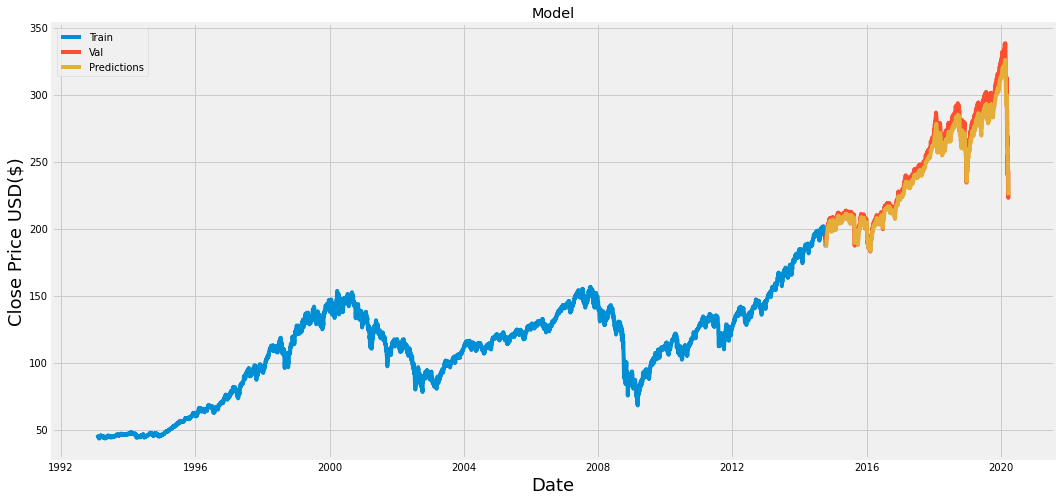

In [43]:
#Plot data
train = data[:training_data_len]
validation = data[training_data_len:]
validation['Predictions'] = predictions
#Visualize
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD($)', fontsize=18)
plt.plot(train['Close'])
plt.plot(validation[['Close','Predictions']])
plt.legend(['Train','Val','Predictions'])
plt.show()

In [44]:
validation

,Close,Predictions
Date,,
2014-10-17,188.470001,185.951385
2014-10-20,190.300003,186.944107
2014-10-21,194.070007,188.416397
2014-10-22,192.690002,191.074432
2014-10-23,194.929993,191.377914
...,...,...
2020-03-18,240.000000,247.695572
2020-03-19,240.509995,241.661011
2020-03-20,228.800003,238.813110


In [0]:
validation['Pr1'] = validation['Close'].shift(-1)
validation['Pr2'] = validation['Predictions'].shift(-1)

In [0]:
validation['Pricediff1'] = validation['Pr1']- validation['Close']
validation['Pricediff2'] =validation['Pr2']- validation['Predictions']

In [0]:
validation['Daily Return'] = validation['Pricediff1']/validation['Close']
validation['Daily Return2'] = validation['Pricediff2']/validation['Predictions']

In [0]:
validation

In [0]:
validation['Direction Real'] = [1 if validation.loc[i, 'Pricediff1'] > 0 else -1
                                for i in validation.index]
validation['Direction Prediction'] = [1 if validation.loc[i, 'Pricediff2'] > 0 else -1
                                for i in validation.index]

In [0]:
validation['Compare'] = [1 if validation.loc[i, 'Direction Real'] == validation.loc[i, 'Direction Prediction'] else 0 for i in validation.index]

In [0]:
validation['Daily Return Comparison'] = validation['Daily Return']/validation['Daily Return2']

In [0]:
print(validation['Daily Return Comparison'][validation['Compare'] == 1].describe())
print(validation['Daily Return Comparison'][validation['Compare'] == 1].sum())

In [0]:
print(validation['Daily Return Comparison'][validation['Compare'] == 0].describe())
print(validation['Daily Return Comparison'][validation['Compare'] == 0].sum())

In [0]:
validation['Compare'].sum()

In [0]:
len(validation['Compare'])